# Lasデータを用いたデータ分析

In [6]:
import laspy

In [7]:
las_data = "/Users/y.takagi/09LD1740.las"

In [8]:
las = laspy.read(las_data)

In [9]:
header = las.header
header


<LasHeader(1.2, <PointFormat(3, 0 bytes of extra dims)>)>

In [10]:
header.version.minor

2

In [11]:
dir(header)

['DEFAULT_POINT_FORMAT',
 'DEFAULT_VERSION',
 '_OLD_LASPY_NAMES',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_point_format',
 '_prefetch_header_data',
 '_sync_extra_bytes_vlr',
 '_version',
 '_vlrs',
 'add_crs',
 'add_extra_dim',
 'add_extra_dims',
 'are_points_compressed',
 'creation_date',
 'evlrs',
 'extra_header_bytes',
 'extra_vlr_bytes',
 'file_source_id',
 'generating_software',
 'global_encoding',
 'grow',
 'major_version',
 'max_point_count',
 'maxs',
 'minor_version',
 'mins',
 'number_of_evlrs',
 'number_of_points_by_return',
 'offset_to_point_data',
 'offsets',
 'parse_crs',
 'partial_reset',
 'point_count',
 'point_fo

In [12]:
point_format = las.point_format
list(point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue']

In [14]:
las.points.array

array([(-11999969, -34219882, 37713,  923, 73, 1, -5, 0, 62, 526713.367513  , 31097, 29555, 28013),
       (-11999954, -34227057, 37783,  809, 73, 1, -5, 0, 62, 526713.4741801 , 30583, 29041, 27499),
       (-11999995, -34233319, 37795,  684, 73, 1, -5, 0, 62, 526713.57418054, 28270, 26471, 24929),
       ...,
       (-11618270, -34499985, 36269, 1773, 17, 1, -8, 0, 66, 524928.37081677, 22616, 23901, 21074),
       (-11614356, -34500000, 41004,  630,  9, 1, -7, 0, 66, 524928.41749972, 19789, 20046, 18761),
       (-11613643, -34499985, 41048, 1539,  9, 1, -7, 0, 66, 524928.43083686, 20303, 20817, 19018)],
      dtype=[('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('bit_fields', 'u1'), ('raw_classification', 'u1'), ('scan_angle_rank', 'i1'), ('user_data', 'u1'), ('point_source_id', '<u2'), ('gps_time', '<f8'), ('red', '<u2'), ('green', '<u2'), ('blue', '<u2')])

In [15]:
las.X

array([-11999969, -11999954, -11999995, ..., -11618270, -11614356,
       -11613643], dtype=int32)

In [14]:
# スケール・オフセットの意味
# 座標は整数
x_first = las.X[0]

# xのスケール: 7.131602618438667e-08 -> 0.0000007
x_scale = header.x_scale

# xのoffset: -44528.753
x_offset = header.x_offset

# なので実際の座標は 531578298 * 0.0000007 + (-44528.753) = -44490.842948180776
x_coordinate = (x_first * x_scale) + x_offset

print(f"{x_first=}")
print(f"{x_scale=}")
print(f"{x_offset=}")
print(f"{x_coordinate=}")

# x_first=531578298
# x_scale=7.131602618438667e-08
# x_offset=-44528.753
# x_coordinate=-44490.842948180776


x_first=-11999969
x_scale=0.001
x_offset=-0.0
x_coordinate=-11999.969000000001


In [ ]:
las.X

In [16]:
import pandas as pd

df = pd.DataFrame([las.X,las.Y,las.Y])

KeyboardInterrupt: 

In [12]:
len(las.X)

6152687

In [17]:
import pyarrow as pa

In [18]:
table = pa.array([las.X,las.Y,las.Z])

In [19]:
table

[
  [
    -11999969,
    -11999954,
    -11999995,
    -11999951,
    -11999955,
    -11999982,
    -11999981,
    -11999946,
    -11999952,
    -11999968,
    ...
    -11674473,
    -11665453,
    -11663572,
    -11657410,
    -11657871,
    -11645718,
    -11633442,
    -11618270,
    -11614356,
    -11613643
  ],
  [
    -34219882,
    -34227057,
    -34233319,
    -34259451,
    -34311760,
    -34493026,
    -34244300,
    -34258941,
    -34281454,
    -34312729,
    ...
    -34499987,
    -34499996,
    -34499993,
    -34499988,
    -34499990,
    -34499990,
    -34499998,
    -34499985,
    -34500000,
    -34499985
  ],
  [
    37713,
    37783,
    37795,
    37575,
    37700,
    44348,
    37734,
    37618,
    37625,
    37738,
    ...
    42051,
    40644,
    41672,
    40320,
    34360,
    34014,
    49356,
    36269,
    41004,
    41048
  ]
]

In [1]:
path = "/Users/y.takagi/09LD1740.las"

In [1]:
from las import LasTokyo as lt
path = "/Users/y.takagi/09LD1740.las"
obj = lt(filepath= path)

In [2]:
obj = lt(filepath= path)

In [3]:
A=obj.getCoordinates()

pyarrow.Table
x: int32
y: int32
z: int32
----
x: [[-11999969,-11999954,-11999995,-11999951,-11999955,...,-11645718,-11633442,-11618270,-11614356,-11613643]]
y: [[-34219882,-34227057,-34233319,-34259451,-34311760,...,-34499990,-34499998,-34499985,-34500000,-34499985]]
z: [[37713,37783,37795,37575,37700,...,34014,49356,36269,41004,41048]]


In [13]:
len(A["x"])

6152687

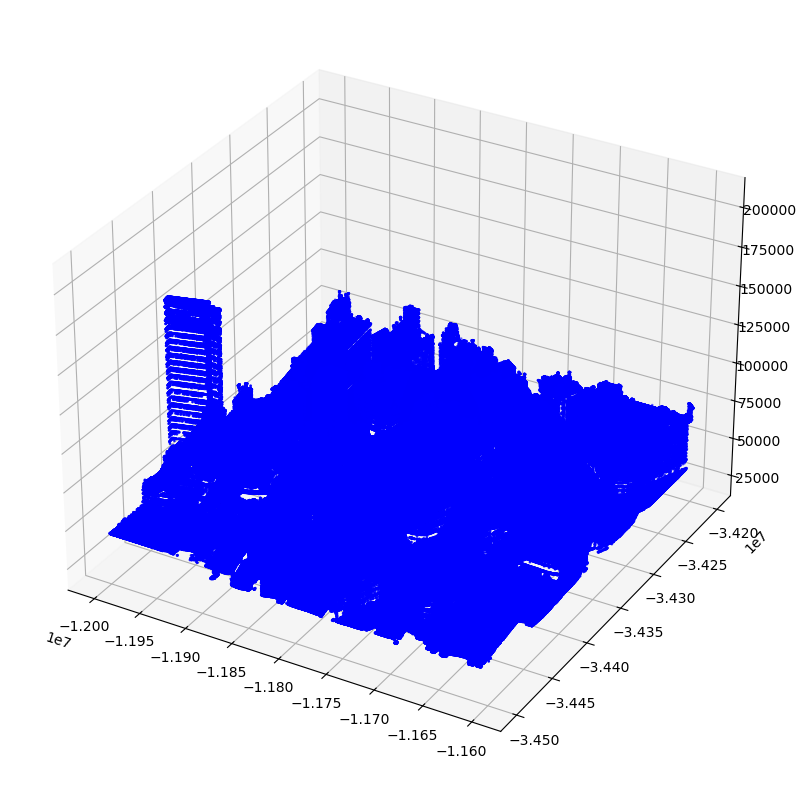

In [15]:
import matplotlib.pyplot as plt
# matplotlibで可視化
fig = plt.figure(figsize = (10, 10))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(A["x"],A["y"],A["z"], s = 1, c = "blue")
plt.show()

In [6]:
data = obj.las_array()

In [9]:
len(data[0])

6152687

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(data)

KeyboardInterrupt: 

In [22]:
import numpy as np 
import random
def get_ball(num_points,r):
    point_cloud = []
    for i in range(num_points):
        t = random.random()
        t = np.arcsin(1-2*t)
        u= random.random() * 2 *np.pi-np.pi
        x = np.cos(t)*np.cos(u)*r
        y = np.cos(t)*np.sin(u)*r
        z= np.sin(t)*r
        point_cloud.append([x, y, z])
    return np.array(point_cloud)
#点群作成
num_points=1000
r=0.5
test_data=get_ball(num_points,r)

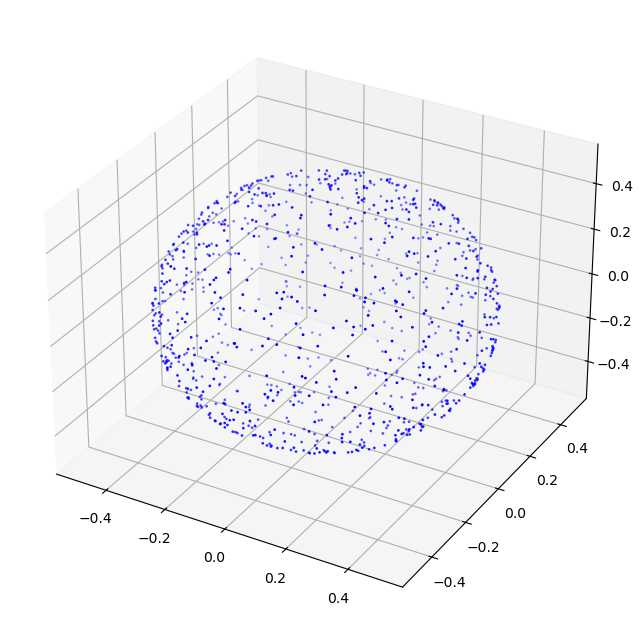

In [23]:
import matplotlib.pyplot as plt
 
#点群作成
num_points=1000
r=0.5
test_data=get_ball(num_points,r)

# matplotlibで可視化
fig = plt.figure(figsize = (8, 8))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(test_data[:,0],test_data[:,1],test_data[:,2], s = 1, c = "blue")
plt.show()

In [ ]:
!

In [16]:
import open3d as o3d

#点群作成
num_points=1000
r=0.5
test_data=get_ball(num_points,r)

#numpy open3d に変換 
pcd=o3d.geometry.PointCloud()
pcd.points = o3d. utility.Vector3dVector(test_data)

# Open3dで可視化
o3d.visualization.draw_geometries([pcd])

ModuleNotFoundError: No module named 'open3d'